<a href="https://colab.research.google.com/github/bangalorejainmujeeb/banagalorejainmusharaf/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

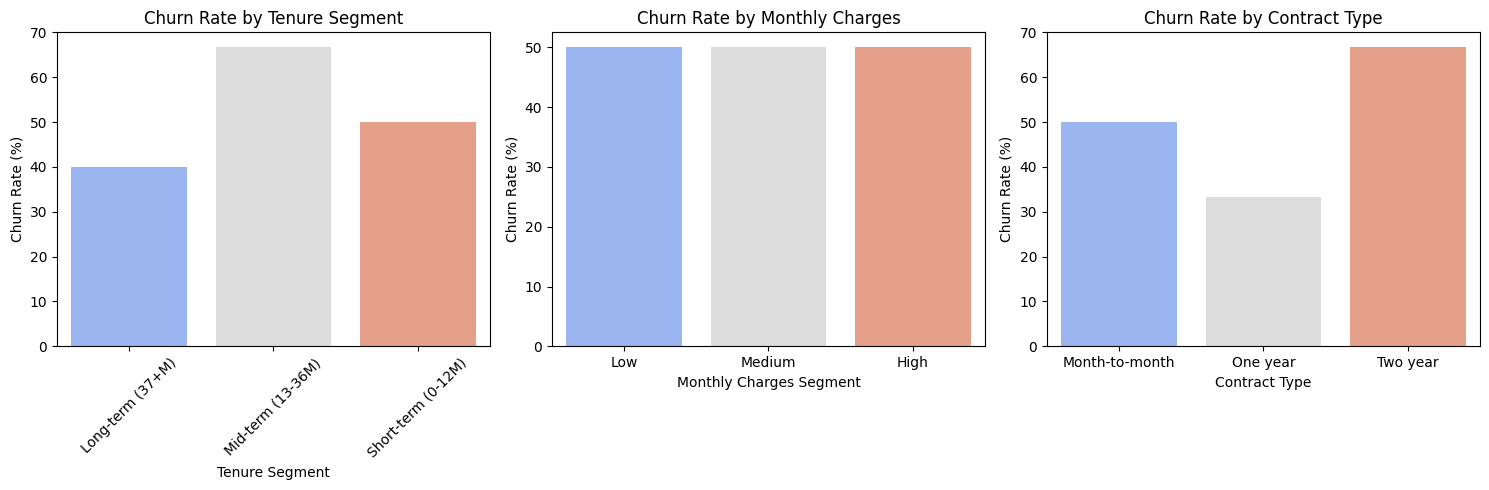

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Silencing FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Create a sample dataframe similar to a customer churn dataset
data = {
    'tenure': [1, 12, 24, 36, 48, 60, 72, 85, 15, 40],
    'MonthlyCharges': [29.99, 59.99, 89.99, 99.99, 120.50, 70.00, 45.99, 60.50, 105.00, 150.00],
    'Churn': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
    'Contract': ['Month-to-month', 'One year', 'Two year', 'Month-to-month', 'One year', 'Two year', 'Month-to-month', 'One year', 'Two year', 'Month-to-month']
}

# Convert the dictionary into a pandas DataFrame
df = pd.DataFrame(data)

# Convert 'Churn' column to binary (if it's categorical)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Segment Customers Based on Tenure
def tenure_category(tenure):
    if tenure <= 12:
        return "Short-term (0-12M)"
    elif tenure <= 36:
        return "Mid-term (13-36M)"
    else:
        return "Long-term (37+M)"

df['TenureSegment'] = df['tenure'].apply(tenure_category)

# Segment Customers Based on Monthly Charges
df['MonthlyChargesSegment'] = pd.qcut(df['MonthlyCharges'], q=3, labels=["Low", "Medium", "High"])

# Analyze Churn Rate Across Segments
tenure_churn = df.groupby("TenureSegment")["Churn"].mean() * 100
monthly_churn = df.groupby("MonthlyChargesSegment", observed=False)["Churn"].mean() * 100
contract_churn = df.groupby("Contract", observed=False)["Churn"].mean() * 100

# Visualization of Churn Rates Across Segments
plt.figure(figsize=(15, 5))

# Churn Rate by Tenure Segment
plt.subplot(1, 3, 1)
sns.barplot(x=tenure_churn.index, y=tenure_churn.values, palette="coolwarm")
plt.xlabel("Tenure Segment")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Tenure Segment")
plt.xticks(rotation=45)

# Churn Rate by Monthly Charges Segment
plt.subplot(1, 3, 2)
sns.barplot(x=monthly_churn.index, y=monthly_churn.values, palette="coolwarm")
plt.xlabel("Monthly Charges Segment")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Monthly Charges")

# Churn Rate by Contract Type
plt.subplot(1, 3, 3)
sns.barplot(x=contract_churn.index, y=contract_churn.values, palette="coolwarm")
plt.xlabel("Contract Type")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Contract Type")

plt.tight_layout()
plt.show()